<a href="https://colab.research.google.com/github/turnontheAC/SQC/blob/sqc/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statistics as stat
import math
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn import linear_model
from scipy.stats import t
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

**13.4**

In [129]:
df = pd.read_csv('/content/13.4  - Sheet1 (1).csv') 
df

,Interaction,a,b,c,totals
0,0,-1,-1,-1,221
1,1,1,-1,-1,325
2,2,-1,1,-1,354
3,3,1,1,-1,552
4,4,-1,-1,1,440
5,5,1,-1,1,406
6,6,-1,1,1,605
7,7,1,1,1,392
8,8,-1,-1,-1,311
9,9,1,-1,-1,435


In [130]:
aa = df[['a']].to_numpy()
bb = df[['b']].to_numpy()
cc = df[['c']].to_numpy()

In [131]:
ab = aa*bb
df['ab'] = ab

In [132]:
ac = aa*cc
df['ac'] = ac

In [133]:
bc = cc*bb
df['bc'] = bc

In [134]:
abc = aa*bb*cc
df['abc'] = abc

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Interaction  16 non-null     int64
 1   a            16 non-null     int64
 2   b            16 non-null     int64
 3   c            16 non-null     int64
 4   totals       16 non-null     int64
 5   ab           16 non-null     int64
 6   ac           16 non-null     int64
 7   bc           16 non-null     int64
 8   abc          16 non-null     int64
dtypes: int64(9)
memory usage: 1.2 KB


In [123]:
X = df[['a',	'b',	'c',	'ab',	'ac',	'bc',	'abc',]]
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,ab,ac,bc,abc
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,-1,1,1
2,1.0,-1,1,-1,-1,1,-1,1
3,1.0,1,1,-1,1,-1,-1,-1
4,1.0,-1,-1,1,1,-1,-1,1
5,1.0,1,-1,1,-1,1,-1,-1
6,1.0,-1,1,1,-1,-1,1,-1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,-1,1,1


In [124]:
Y = df[['totals',]]
Y

,totals
0,221
1,325
2,354
3,552
4,440
5,406
6,605
7,392
8,311
9,435


In [125]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 totals   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     6.665
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00790
Time:                        00:29:15   Log-Likelihood:                -79.629
No. Observations:                  16   AIC:                             175.3
Df Residuals:                       8   BIC:                             181.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.1250     12.406     33.301      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [93]:
r = res.resid
r

0    -45.0
1    -55.0
2      3.0
3     40.0
4     -6.5
5     14.5
6     52.5
7    -13.5
8     45.0
9     55.0
10    -3.0
11   -40.0
12     6.5
13   -14.5
14   -52.5
15    13.5
dtype: float64

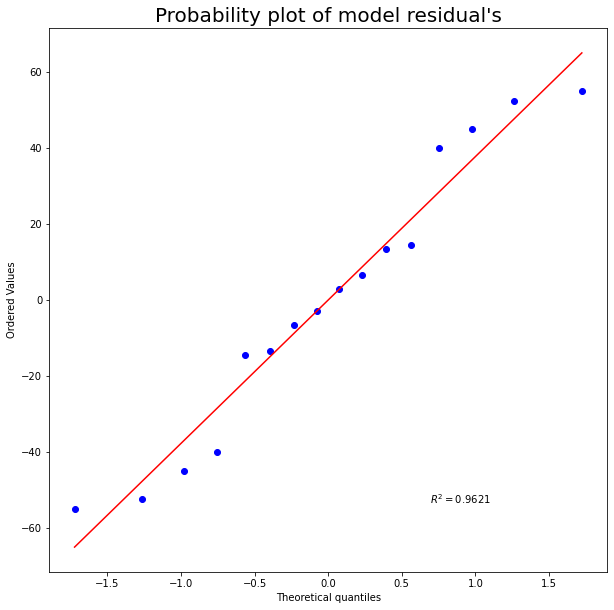

In [94]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [95]:
stats.levene(df['totals'][df['a'] == -1],
             df['totals'][df['a'] == 1])

LeveneResult(statistic=2.9911667871195697, pvalue=0.10569523307659201)

In [96]:
stats.levene(df['totals'][df['b'] == -1],
             df['totals'][df['b'] == 1])

LeveneResult(statistic=0.3721709444936149, pvalue=0.5515977352989001)

In [97]:
stats.levene(df['totals'][df['c'] == -1],
             df['totals'][df['c'] == 1])

LeveneResult(statistic=0.6509474436896675, pvalue=0.43326735432278096)

In [98]:
stats.levene(df['totals'][df['ab'] == -1],
             df['totals'][df['ab'] == 1])

LeveneResult(statistic=0.36206641196455125, pvalue=0.5569801294934988)

In [99]:
stats.levene(df['totals'][df['ac'] == -1],
             df['totals'][df['ac'] == 1])

LeveneResult(statistic=1.940860817843655, pvalue=0.18530183727689029)

In [100]:
stats.levene(df['totals'][df['bc'] == -1],
             df['totals'][df['bc'] == 1])

LeveneResult(statistic=0.048266026600113365, pvalue=0.8292794948025995)

In [101]:
stats.levene(df['totals'][df['abc'] == -1],
             df['totals'][df['abc'] == 1])

LeveneResult(statistic=2.338143362875984, pvalue=0.14851615604002902)

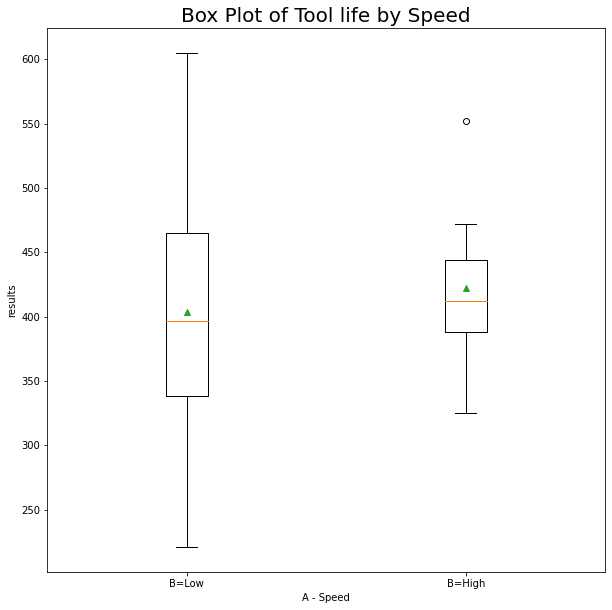

In [102]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool life by Speed", fontsize= 20)
ax.set

data2 = [df['totals'][df['a'] == -1],
         df['totals'][df['a'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("A - Speed")
plt.ylabel("results")

plt.show()

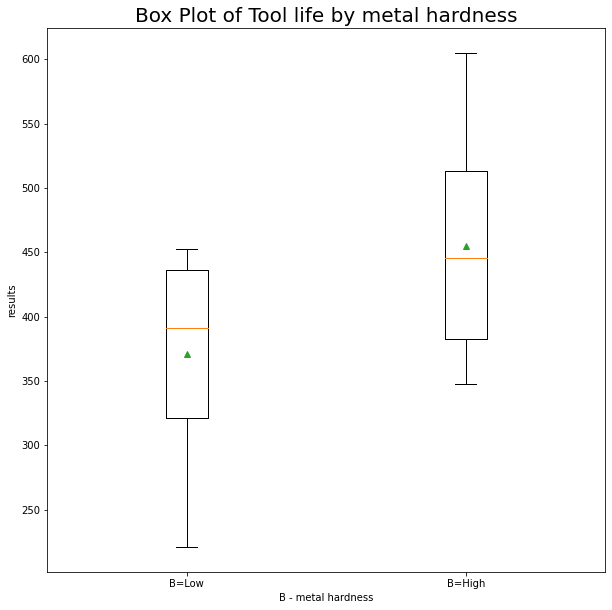

In [103]:


fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Tool life by metal hardness", fontsize= 20)
ax.set

data2 = [df['totals'][df['b'] == -1],
         df['totals'][df['b'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("B - metal hardness")
plt.ylabel("results")

plt.show()

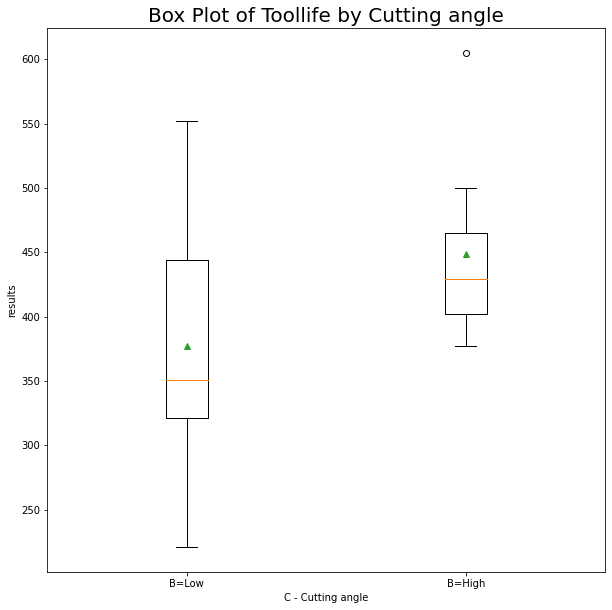

In [104]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Toollife by Cutting angle", fontsize= 20)
ax.set

data2 = [df['totals'][df['c'] == -1],
         df['totals'][df['c'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("C - Cutting angle")
plt.ylabel("results")

plt.show()

**13.6**

In [159]:
df2 = pd.read_csv('/content/13.6.csv') 
df2

,treatment,a,b,c,d,results
0,1,-1,-1,-1,-1,188
1,a,1,-1,-1,-1,172
2,b,-1,1,-1,-1,179
3,ab,1,1,-1,-1,185
4,c,-1,-1,1,-1,175
5,ac,1,-1,1,-1,183
6,bc,-1,1,1,-1,190
7,abc,1,1,1,-1,175
8,d,-1,-1,-1,1,200
9,ad,1,-1,-1,1,170


In [160]:
aa = df2[['a']].to_numpy()
bb = df2[['b']].to_numpy()
cc = df2[['c']].to_numpy()
dd = df2[['d']].to_numpy()

In [161]:
ab = aa*bb
df2['ab'] = ab

In [162]:
ac = aa*cc
df2['ac'] = ac

In [164]:
ad = aa*dd
df2['ad'] = ad

In [174]:
bc = bb*cc
df2['bc'] = bc

In [165]:
bd = bb*dd
df2['bd'] = bd

In [166]:
cd = cc*dd
df2['cd'] = cd

In [170]:
abc = aa*bb*cc
df2['abc'] = ad

In [169]:
bcd = bb*cc*dd
df2['bcd'] = bcd

In [168]:
abd = aa*bb*dd
df2['abd'] = abd

In [167]:
abcd = aa*bb*cc*dd
df2['abcd'] = abcd

In [175]:
X = df2[['a',	'b',	'c',	'ab',	'ac',	'bc',	'abc', 'ad', 'bd', 'cd', 'abcd', 'bcd', 'abd']]
X= sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,ab,ac,bc,abc,ad,bd,cd,abcd,bcd,abd
0,1.0,-1,-1,-1,1,1,1,1,1,1,1,1,-1,-1
1,1.0,1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1
2,1.0,-1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1
3,1.0,1,1,-1,1,-1,-1,-1,-1,-1,1,1,1,-1
4,1.0,-1,-1,1,1,-1,-1,1,1,1,-1,-1,1,-1
5,1.0,1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1
6,1.0,-1,1,1,-1,-1,1,1,1,-1,-1,1,-1,1
7,1.0,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1
8,1.0,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1
9,1.0,1,-1,-1,-1,-1,1,1,1,-1,-1,1,1,-1


In [177]:
Y = df2[['results',]]
Y

,results
0,188
1,172
2,179
3,185
4,175
5,183
6,190
7,175
8,200
9,170


In [178]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                results   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     2.268
Date:                Mon, 03 Oct 2022   Prob (F-statistic):             0.0536
Time:                        01:15:09   Log-Likelihood:                -97.084
No. Observations:                  32   AIC:                             220.2
Df Residuals:                      19   BIC:                             239.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.7813      1.153    158.471      0.0

In [179]:
r2 = res.resid
r2

0    -2.40625
1    -9.03125
2    -8.09375
3     3.65625
4    -7.53125
5     3.59375
6     5.15625
7    -0.59375
8     7.59375
9    -4.15625
10    2.90625
11    2.53125
12    6.34375
13    8.09375
14    8.53125
15   -3.09375
16    4.59375
17   -1.03125
18   -0.09375
19   -3.34375
20   -2.53125
21   -1.40625
22   -4.84375
23   -7.59375
24    0.59375
25    3.84375
26   -5.09375
27    7.53125
28   -6.65625
29    0.09375
30    1.53125
31    0.90625
dtype: float64

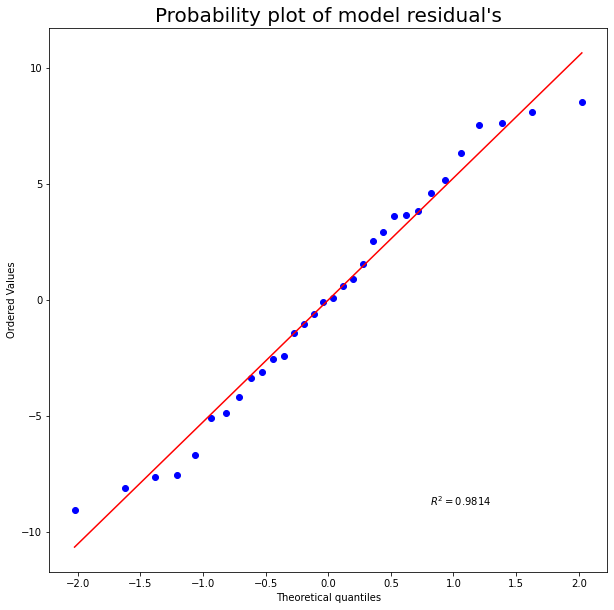

In [180]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()